In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  # import the curve fitting function
%matplotlib inline

### Read-in

In [2]:
df = pd.read_excel('SpectralData.xlsx', sheetname=None)

In [3]:
df['Hydrogen']

,Color,Angles,Minute,CCW,AnglesCCW,MinuteCCW
0,Red,191,12,Red,168,47
1,Teal,188,16,Teal,171,43
2,Violet,187,24,Violet,172,35
3,Red,191,15,Red,168,51
4,Teal,188,18,Teal,171,45
5,Violet,187,23,Violet,172,42
6,Red,191,14,Red,168,46
7,Teal,188,21,Teal,171,40
8,Violet,187,25,Violet,172,37


In [4]:
df['Mercury']

,Color,Angles,Minute,CCW,AnglesCCW,MinuteCCW
0,Yellow1,189,49,Yellow1,170,4
1,Yellow2,189,47,Yellow2,170,6
2,Green,189,14,Green,170,36
3,Blue,188,21,Blue,171,33
4,Violet,187,22,Violet,172,30
5,Yellow1,189,51,Yellow1,170,5
6,Yellow2,189,50,Yellow2,170,7
7,Green,189,20,Green,170,40
8,Blue,188,26,Blue,171,37
9,Violet,187,27,Violet,172,39


### Hydrogen

In [5]:
#Degrees
HRed = np.array([df['Hydrogen']['Angles'][i] for i in np.arange(0,len(df['Hydrogen']['Angles']),3) ])
HTeal = np.array([df['Hydrogen']['Angles'][i] for i in np.arange(1,len(df['Hydrogen']['Angles']),3) ])
HViolet = np.array([df['Hydrogen']['Angles'][i] for i in np.arange(2,len(df['Hydrogen']['Angles']),3) ])

#Add Minutes
HRed = HRed + np.array([df['Hydrogen']['Minute'][i] for i in np.arange(0,len(df['Hydrogen']['Minute']),3) ])/60
HTeal = HTeal + np.array([df['Hydrogen']['Minute'][i] for i in np.arange(1,len(df['Hydrogen']['Minute']),3) ])/60
HViolet = HViolet + np.array([df['Hydrogen']['Minute'][i] for i in np.arange(2,len(df['Hydrogen']['Minute']),3) ])/60

# Standard deviation of the mean
HRedStd = np.std(HRed)/np.sqrt(3)
HTealStd = np.std(HTeal)/np.sqrt(3)
HVioletStd = np.std(HViolet)/np.sqrt(3)

# Averaging
HRed = np.mean(HRed)
HTeal = np.mean(HTeal)
HViolet = np.mean(HViolet)

# True angle is difference from 180
HRed = abs(HRed - 180)
HTeal = abs(HTeal - 180)
HViolet = abs(HViolet-180)

In [6]:
#Degrees
HRedCCW = np.array([df['Hydrogen']['AnglesCCW'][i] for i in np.arange(0,len(df['Hydrogen']['AnglesCCW']),3) ])
HTealCCW = np.array([df['Hydrogen']['AnglesCCW'][i] for i in np.arange(1,len(df['Hydrogen']['AnglesCCW']),3) ])
HVioletCCW = np.array([df['Hydrogen']['AnglesCCW'][i] for i in np.arange(2,len(df['Hydrogen']['AnglesCCW']),3) ])

#Add Minutes
HRedCCW = HRedCCW + np.array([df['Hydrogen']['MinuteCCW'][i] for i in np.arange(0,len(df['Hydrogen']['MinuteCCW']),3) ])/60
HTealCCW = HTealCCW + np.array([df['Hydrogen']['MinuteCCW'][i] for i in np.arange(1,len(df['Hydrogen']['MinuteCCW']),3) ])/60
HVioletCCW = HVioletCCW + np.array([df['Hydrogen']['MinuteCCW'][i] for i in np.arange(2,len(df['Hydrogen']['MinuteCCW']),3) ])/60


# Standard deviation of the mean
HRedCCWStd = np.std(HRedCCW)/np.sqrt(3)
HTealCCWStd = np.std(HTealCCW)/np.sqrt(3)
HVioletCCWStd = np.std(HVioletCCW)/np.sqrt(3)

#Averaging
HRedCCW = np.mean(HRedCCW)
HTealCCW = np.mean(HTealCCW)
HVioletCCW = np.mean(HVioletCCW)

# True angle is difference from 180
HRedCCW = abs(HRedCCW - 180)
HTealCCW = abs(HTealCCW - 180)
HVioletCCW = abs(HVioletCCW-180)

In [7]:
HRed

11.22777777777776

In [8]:
HRedStd

0.012001371663720502

In [9]:
HRedCCWStd

0.020786985482073739

In [10]:
# Average CW and CCW
HRed = (HRed + HRedCCW)/2
HTeal = (HTeal + HTealCCW)/2
HViolet = (HViolet + HVioletCCW)/2

HRedStd = (HRedStd + HRedCCWStd)/2
HTealStd = (HTealStd + HTealCCWStd)/2
HVioletStd = (HVioletStd + HVioletCCWStd)/2

# Convert to radians
HRed = np.deg2rad(HRed)
HTeal = np.deg2rad(HTeal)
HViolet = np.deg2rad(HViolet)

HRedStd = np.deg2rad(HRedStd)
HTealStd = np.deg2rad(HTealStd)
HVioletStd = np.deg2rad(HVioletStd)

print('HRed = %.7f +/-%.7f Radians' % (HRed,HRedStd))
print('HTeal = %.7f +/-%.7f Radians' % (HTeal,HTealStd))
print('HViolet = %.7f +/-%.7f Radians' % (HViolet,HVioletStd))

HRed = 0.1957193 +/-0.0002861 Radians
HTeal = 0.1448138 +/-0.0003451 Radians
HViolet = 0.1288635 +/-0.0003158 Radians


### Mercury

In [11]:
#Degrees
HgY1 = np.array([df['Mercury']['Angles'][i] for i in np.arange(0,len(df['Mercury']['Angles']),5) ])
HgY2 = np.array([df['Mercury']['Angles'][i] for i in np.arange(1,len(df['Mercury']['Angles']),5) ])
HgG = np.array([df['Mercury']['Angles'][i] for i in np.arange(2,len(df['Mercury']['Angles']),5) ])
HgB = np.array([df['Mercury']['Angles'][i] for i in np.arange(3,len(df['Mercury']['Angles']),5) ])
HgV = np.array([df['Mercury']['Angles'][i] for i in np.arange(4,len(df['Mercury']['Angles']),5) ])

#Add Minutes
HgY1 = HgY1 + np.array([df['Mercury']['Minute'][i] for i in np.arange(0,len(df['Mercury']['Minute']),5) ])/60
HgY2 = HgY2 + np.array([df['Mercury']['Minute'][i] for i in np.arange(1,len(df['Mercury']['Minute']),5) ])/60
HgG = HgG + np.array([df['Mercury']['Minute'][i] for i in np.arange(2,len(df['Mercury']['Minute']),5) ])/60
HgB = HgB + np.array([df['Mercury']['Minute'][i] for i in np.arange(3,len(df['Mercury']['Minute']),5) ])/60
HgV = HgV + np.array([df['Mercury']['Minute'][i] for i in np.arange(4,len(df['Mercury']['Minute']),5) ])/60

# Averaging
HgY1 = np.mean(HgY1)
HgY2 = np.mean(HgY2)
HgG = np.mean(HgG)
HgB = np.mean(HgB)
HgV = np.mean(HgV)

# True angle is difference from 180
HgY1 = abs(HgY1-180)
HgY2 = abs(HgY2 - 180)
HgG = abs(HgG-180)
HgB = abs(HgB-180)
HgV = abs(HgV-180)

In [12]:
#Degrees
HgY1CCW = np.array([df['Mercury']['AnglesCCW'][i] for i in np.arange(0,len(df['Mercury']['AnglesCCW']),5) ])
HgY2CCW = np.array([df['Mercury']['AnglesCCW'][i] for i in np.arange(1,len(df['Mercury']['AnglesCCW']),5) ])
HgGCCW = np.array([df['Mercury']['AnglesCCW'][i] for i in np.arange(2,len(df['Mercury']['AnglesCCW']),5) ])
HgBCCW = np.array([df['Mercury']['AnglesCCW'][i] for i in np.arange(3,len(df['Mercury']['AnglesCCW']),5) ])
HgVCCW = np.array([df['Mercury']['AnglesCCW'][i] for i in np.arange(4,len(df['Mercury']['AnglesCCW']),5) ])

#Add Minutes

HgY1CCW = HgY1CCW + np.array([df['Mercury']['MinuteCCW'][i] for i in np.arange(0,len(df['Mercury']['MinuteCCW']),5) ])/60
HgY2CCW = HgY2CCW + np.array([df['Mercury']['MinuteCCW'][i] for i in np.arange(1,len(df['Mercury']['MinuteCCW']),5) ])/60
HgGCCW = HgGCCW + np.array([df['Mercury']['MinuteCCW'][i] for i in np.arange(2,len(df['Mercury']['MinuteCCW']),5) ])/60
HgBCCW = HgBCCW + np.array([df['Mercury']['MinuteCCW'][i] for i in np.arange(3,len(df['Mercury']['MinuteCCW']),5) ])/60
HgVCCW = HgVCCW + np.array([df['Mercury']['MinuteCCW'][i] for i in np.arange(4,len(df['Mercury']['MinuteCCW']),5) ])/60

# Averaging
HgY1CCW = np.mean(HgY1CCW)
HgY2CCW = np.mean(HgY2CCW)
HgGCCW = np.mean(HgGCCW)
HgBCCW = np.mean(HgBCCW)
HgVCCW = np.mean(HgVCCW)

# True angle is difference from 180
HgY1CCW = abs(HgY1CCW-180)
HgY2CCW = abs(HgY2CCW -180)
HgGCCW = abs(HgGCCW-180)
HgBCCW = abs(HgBCCW-180)
HgVCCW = abs(HgVCCW-180)

In [13]:
HgVCCW

7.4250000000000114

In [14]:
HVioletCCWStd

0.028327886186621257

In [15]:
# Average CW and CCW
HgYellow1 = (HgY1 + HgY1CCW)/2
HgYellow2 = (HgY2 + HgY2CCW)/2
HgGreen = (HgG + HgGCCW)/2
HgBlue = (HgB + HgBCCW)/2
HgViolet = (HgV + HgVCCW)/2

#Approximating uncertainty based on Hydrogen measurements.
HgYellow1Std = HRedStd
HgYellow2Std = HRedStd
HgGreenStd =  HTealStd
HgBlueStd = HTealStd
HgVioletStd = HVioletStd

# Convert to radians
HgYellow1 = np.deg2rad(HgYellow1)
HgYellow2 = np.deg2rad(HgYellow2)
HgGreen = np.deg2rad(HgGreen)
HgBlue = np.deg2rad(HgBlue)
HgViolet = np.deg2rad(HgViolet)

#Std are already in radians


print('HgYellow1 = %.7f +/-%.7f Radians' % (HgYellow1,HgYellow1Std))
print('HgYellow2 = %.7f +/-%.7f Radians' % (HgYellow2,HgYellow2Std))
print('HgGreen = %.7f +/-%.7f Radians' % (HgGreen,HgGreenStd))
print('HgBlue = %.7f +/-%.7f Radians' % (HgBlue,HgBlueStd))
print('HgViolet = %.7f +/-%.7f Radians' % (HgViolet,HgVioletStd))

HgYellow1 = 0.1724240 +/-0.0002861 Radians
HgYellow2 = 0.1719149 +/-0.0002861 Radians
HgGreen = 0.1627520 +/-0.0003451 Radians
HgBlue = 0.1466804 +/-0.0003451 Radians
HgViolet = 0.1294453 +/-0.0003158 Radians


### Calculating Wavelengths

In [16]:
d = 1/(3*1e5)

In [17]:
def wavelength(theta):
    #Theta in radians
    return d*np.sin(theta)

In [18]:
def uncertainty(theta):
    delta_d = 1.2*1e-8 #From text
    delta_theta = np.deg2rad(2/60) #Three minute uncertainty from Visual and Tool.
    return abs(np.sin(theta)*delta_d) + abs(d*np.cos(theta)*delta_theta)

### Hydrogen

In [19]:
HWave = np.array([
        wavelength(HRed),
        wavelength(HTeal),
        wavelength(HViolet)
    ])

HWave = HWave*1e9 #Observed Hydrogen spectrum in nm
HWave

array([ 648.2404525 ,  481.02742422,  428.35708562])

In [20]:
HAngles = np.array([HRed,HTeal,HViolet])

In [21]:
HWaveu = np.array([uncertainty(entry) for entry in HAngles])*1e9
HWaveu

array([ 4.23589619,  3.65065486,  3.46526107])

In [22]:
HWaveStd = np.array([
        wavelength(HRedStd),
        wavelength(HTealStd),
        wavelength(HVioletStd),

    ])

HWaveStd = HWaveStd*1e9 #Observed Hydrogen spectrum in nm
HWaveStd

array([ 0.95377463,  1.15030967,  1.05256815])

### Mercury

In [23]:
HgWave = np.array([
        wavelength(HgYellow1),
        wavelength(HgYellow2),
        wavelength(HgGreen),
        wavelength(HgBlue),
        wavelength(HgViolet)
    ])

HgWave = HgWave*1e9 #Observed Hydrogen spectrum in nm
HgWave

array([ 571.90297688,  570.2312162 ,  540.11467581,  487.18323363,
        430.28018857])

In [24]:
HgAngles = np.array([HgYellow1, HgYellow2, HgGreen, HgBlue, HgViolet])

In [25]:
Hgu = np.array([uncertainty(entry) for entry in HgAngles])

In [26]:
Hgu

array([  3.96934974e-09,   3.96350052e-09,   3.85804052e-09,
         3.67229008e-09,   3.47203893e-09])

In [27]:
HgWaveStd = np.array([
        wavelength(HgYellow1Std),
        wavelength(HgYellow2Std),
        wavelength(HgGreenStd),
        wavelength(HgBlueStd),
        wavelength(HgVioletStd)
    ])

HgWaveStd = HgWaveStd*1e9 #Observed Hydrogen spectrum in nm
HgWaveStd

array([ 0.95377463,  0.95377463,  1.15030967,  1.15030967,  1.05256815])

### Results

In [28]:
from IPython.display import Latex

## Hydrogen

In [29]:
print('HRed = %.1f +/-%.1f (nm)' % (HWave[0],HWaveStd[0]))
print('HTeal = %.1f +/-%.1f (nm)' % (HWave[1],HWaveStd[1]))
print('HViolet = %.1f +/-%.1f (nm)' % (HWave[2],HWaveStd[2]))

HRed = 648.2 +/-1.0 (nm)
HTeal = 481.0 +/-1.2 (nm)
HViolet = 428.4 +/-1.1 (nm)


## Mercury

In [30]:
print('HgYellow1 = %.1f +/-%.1f (nm)' % (HgWave[0],HgWaveStd[0]))
print('HgYellow2 = %.1f +/-%.1f (nm)' % (HgWave[1],HgWaveStd[1]))
print('HgGreen = %.1f +/-%.1f (nm)' % (HgWave[2],HgWaveStd[2]))
print('HgBlue = %.1f +/-%.1f (nm)' % (HgWave[3],HgWaveStd[3]))
print('HgViolet = %.1f +/-%.1f (nm)' % (HgWave[4],HgWaveStd[4]))

HgYellow1 = 571.9 +/-1.0 (nm)
HgYellow2 = 570.2 +/-1.0 (nm)
HgGreen = 540.1 +/-1.2 (nm)
HgBlue = 487.2 +/-1.2 (nm)
HgViolet = 430.3 +/-1.1 (nm)


## Hydrogen Analysis

In [31]:
h = 6.6261*1e-34 #Plancks constant Js
e = 1.6022*1e-19 #Electron Charge C
c = 2.9989*1e8 #Light Speed m/s

hc_ev = h*c/e

E_r = 13.60 #Ionization energy. eV

def HSpectrum(n):
    q = 1/(1/4 - 1/(n**2))
    return (hc_ev*q/E_r)*1e9 #Emitted wavelength in nm

In [32]:
HSpectrum(3)

656.5938805098868

In [33]:
HSpectrum(4)

486.3658374147311

In [34]:
HSpectrum(5)

434.2552119774385

Then our recorded wavelengths for Hydrogen correspond to $n_o$ = 3, 4, and 5.

### Plot the Rydberg Equation to Find Measured $E_r$

In [35]:
nH = np.array([3,4,5])
q_array = np.array([1/(1/4 - 1/(entry**2)) for entry in nH])

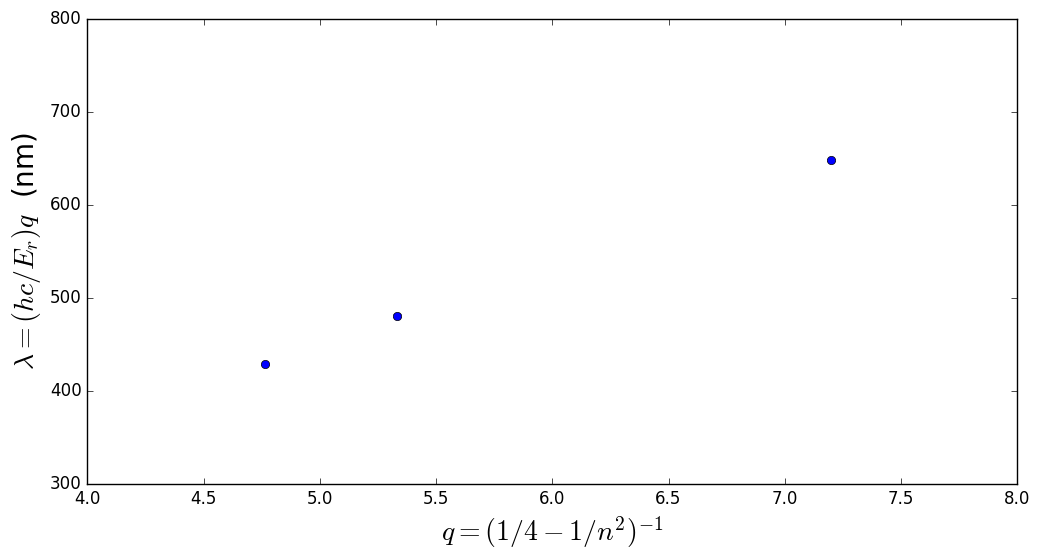

In [36]:
plt.figure(figsize=(12,6))
plt.errorbar(q_array,HWave,HWaveStd,linestyle = '',marker = 'o');
plt.xlabel('$q = (1/4 - 1/n^2)^{-1}$',size=20);
plt.ylabel('$\lambda = (hc/E_r)q$  (nm)', size = 20);
plt.xticks(size=12);
plt.yticks(size=12);
plt.xlim(4,8);
plt.ylim(300,800);

In [37]:
def myfun(x,m):
    ans = m*x  # this is y, "the function to be fit"
    return ans

In [38]:
p0 = [1240/13.6]

In [39]:
xlots = np.linspace(-1,7.5,50)  # need lots of data points for smooth curve
yfit = np.zeros((len(nH),xlots.size))

plsq, pcov = curve_fit(myfun, q_array, HWave, p0, HWaveu)  # curve fit returns p and covariance matrix
# these give the parameters and the uncertainties
m = plsq[0]
em = np.sqrt(pcov[0,0])
yfit = myfun(xlots,plsq[0])  # use fit results for a, b, c
    
print('hc/E_r = %.2f +/- %.2f nm' % (plsq[0], np.sqrt(pcov[0,0])))

hc/E_r = 90.06 +/- 0.07 nm


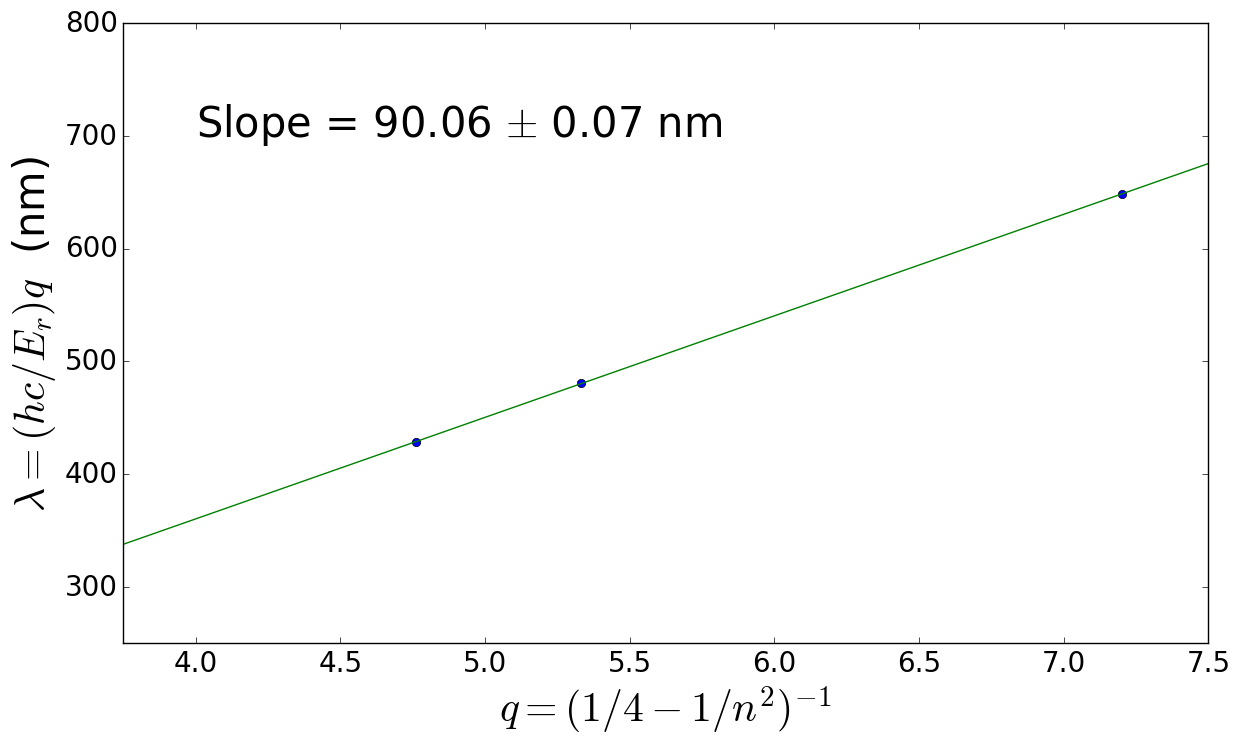

In [40]:
plt.figure(figsize=(14,8))
plt.errorbar(q_array,HWave,HWaveStd,linestyle = '',marker = 'o');
plt.xlabel('q',size=20);
plt.xlabel('$q = (1/4 - 1/n^2)^{-1}$',size=30);
plt.ylabel('$\lambda = (hc/E_r)q$  (nm)', size = 30);
plt.text(4, 700, 'Slope = %.2f $\pm$ %.2f nm' %(m,em), fontsize=30)
plt.xticks(size=20);
plt.yticks(size=20);
plt.xlim(3.75,7.5);
plt.ylim(250,800);
plt.plot(xlots,yfit);
plt.savefig('Rhydberg')

### $E_r$ Result

In [41]:
hc_ev*1e9

1240.2328854075643

In [42]:
E_r = hc_ev/m
E_r = E_r*1e9 #nm was used in the calculation above. Converting to eV
E_r

13.771009117973231

In [43]:
dE_r = (hc_ev/(m**2))*em
dE_r = dE_r*1e9 #nm was used in the calculation above. Converting to eV
dE_r

0.010108168898823043

In [44]:
print('E_r = %.2f +/- %.2f eV' % (E_r, dE_r))

E_r = 13.77 +/- 0.01 eV


### Mercury Analysis

In [45]:
def energy(wavelength):
    return hc_ev/wavelength

In [46]:
HgWave

array([ 571.90297688,  570.2312162 ,  540.11467581,  487.18323363,
        430.28018857])

In [47]:
HgEnergies = np.array([energy(entry)*1e9 for entry in HgWave]) #In eV
HgEnergies

array([ 2.16860715,  2.17496491,  2.29623993,  2.54572161,  2.88238436])